<a href="https://colab.research.google.com/github/berryaesi/CSEL-302-Introduction-to-Intelligent-System/blob/main/2B_TORRES_EXER7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **- Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **Part 1: Data Preprocessing**

***Load the Dataset:*** Import the dataset using Pandas and display its structure.

In [ ]:
# Load the dataset
dataSet = pd.read_csv('Netflix_Userbase.csv')

# Display the structure of the dataset
print("Dataset Structure:")
print(dataSet.info())

print("First few rows of the dataset:")
print(dataSet.head())

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB
None
First few rows of the dataset:
   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-

***Missing Values:*** Identify and manage any missing values appropriately.

In [ ]:
print("Missing Values:")
print(dataSet.isnull().sum())

Missing Values:
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


***Encode Categorical Variables:*** Transform categorical variables into numerical representations
suitable for regression analysis.

In [ ]:
# we need to encode them into numerical representations. We can use one-hot encoding for this purpose.
dataEncoded = pd.get_dummies(dataSet, columns=['Subscription Type', 'Monthly Revenue', 'Country', 'Gender', 'Device', 'Plan Duration'])

***Feature Selection:*** Decide which features to include in the regression models. Explain your choice

In [ ]:
selFeatures = ['Age'] + [col for col in dataEncoded.columns if 'Subscription Type' in col] + \
                    [col for col in dataEncoded.columns if 'Monthly Revenue' in col] + \
                    [col for col in dataEncoded.columns if 'Country' in col] + \
                    [col for col in dataEncoded.columns if 'Gender' in col] + \
                    [col for col in dataEncoded.columns if 'Device' in col] + \
                    [col for col in dataEncoded.columns if 'Plan Duration' in col]

In [ ]:
# Selecting relevant features
dataFinal = dataEncoded[selFeatures]

# Display the structure of the preprocessed dataset
print("Preprocessed Dataset Structure:")
print(dataFinal.info())

Preprocessed Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         2500 non-null   int64
 1   Subscription Type_Basic     2500 non-null   uint8
 2   Subscription Type_Premium   2500 non-null   uint8
 3   Subscription Type_Standard  2500 non-null   uint8
 4   Monthly Revenue_10          2500 non-null   uint8
 5   Monthly Revenue_11          2500 non-null   uint8
 6   Monthly Revenue_12          2500 non-null   uint8
 7   Monthly Revenue_13          2500 non-null   uint8
 8   Monthly Revenue_14          2500 non-null   uint8
 9   Monthly Revenue_15          2500 non-null   uint8
 10  Country_Australia           2500 non-null   uint8
 11  Country_Brazil              2500 non-null   uint8
 12  Country_Canada              2500 non-null   uint8
 13  Country_France              250


***Explanation:***

On feature selection, I chose those features to predict the monthly revenue. The selected features have a connection the outcome we need. Example: the Subsription Type. To predict the monthly revenue, we tend to look at its subscription type. We all know that premium is the most expensive and basic is the least expensive. We can predict the monthly revenue through this because this is basically what the customers are paying for.

That is my basis for selecting features to be included in the regression models.


# **Part 2: Exploratory Data Analysis (EDA)**

***Descriptive Statistics:*** Provide a summary of the data using the .describe() method.

In [ ]:
print("Descriptive Statistics:")
print(dataFinal.describe())

Descriptive Statistics:
               Age  Subscription Type_Basic  Subscription Type_Premium  \
count  2500.000000              2500.000000                 2500.00000   
mean     38.795600                 0.399600                    0.29320   
std       7.171778                 0.489914                    0.45532   
min      26.000000                 0.000000                    0.00000   
25%      32.000000                 0.000000                    0.00000   
50%      39.000000                 0.000000                    0.00000   
75%      45.000000                 1.000000                    1.00000   
max      51.000000                 1.000000                    1.00000   

       Subscription Type_Standard  Monthly Revenue_10  Monthly Revenue_11  \
count                 2500.000000         2500.000000         2500.000000   
mean                     0.307200            0.163600            0.155200   
std                      0.461425            0.369986            0.362168   
m

***Visualizations:*** Create visualizations (e.g., distribution of Monthly Revenue, user demographics)
to understand the data better.

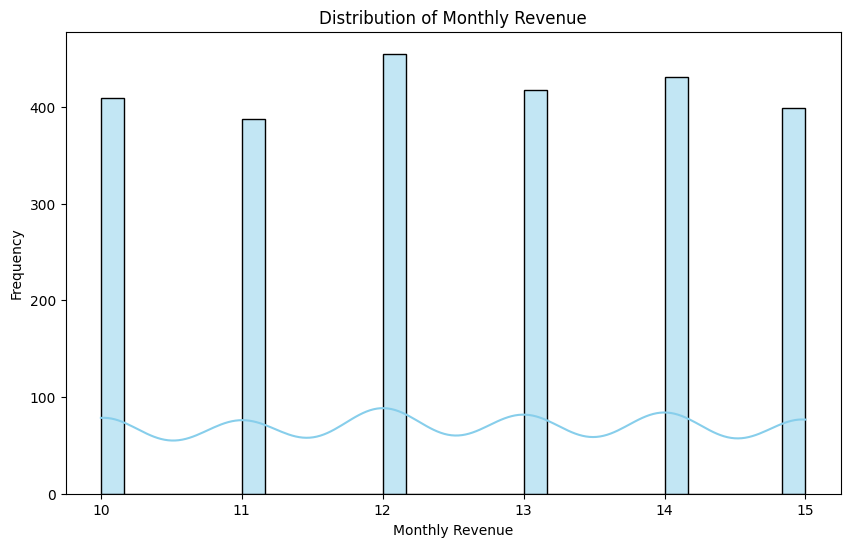

In [ ]:
# Distribution of Monthly Revenue
plt.figure(figsize=(10, 6))
sns.histplot(dataSet['Monthly Revenue'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

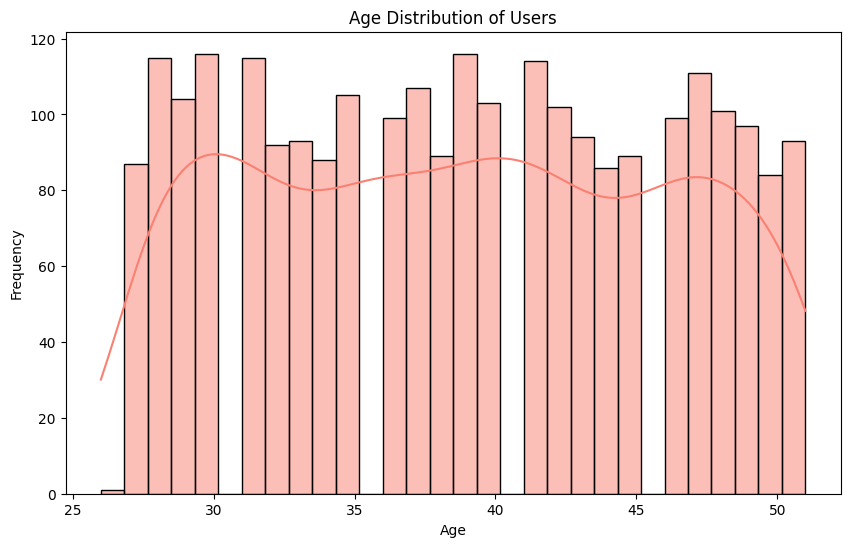

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(dataSet['Age'], bins=30, kde=True, color='salmon')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-257-8231de475dc7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subscription Type', data=dataSet, palette='Set2')


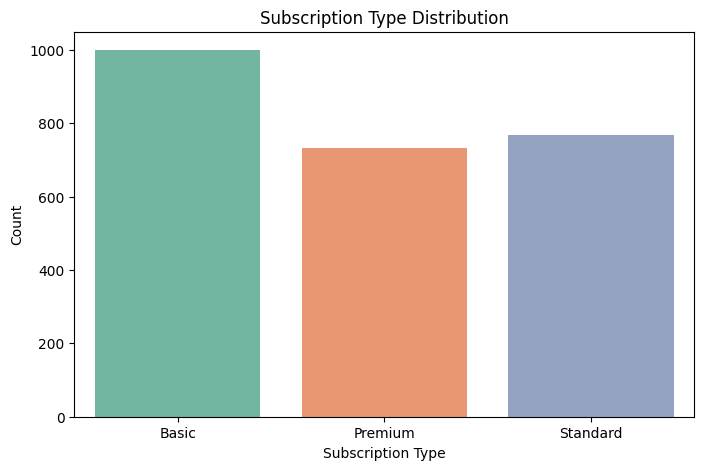

In [ ]:
# Subscription Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Subscription Type', data=dataSet, palette='Set2')
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

<ipython-input-258-d933b0448b0e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=dataSet, palette='viridis', order=dataSet['Country'].value_counts().index)


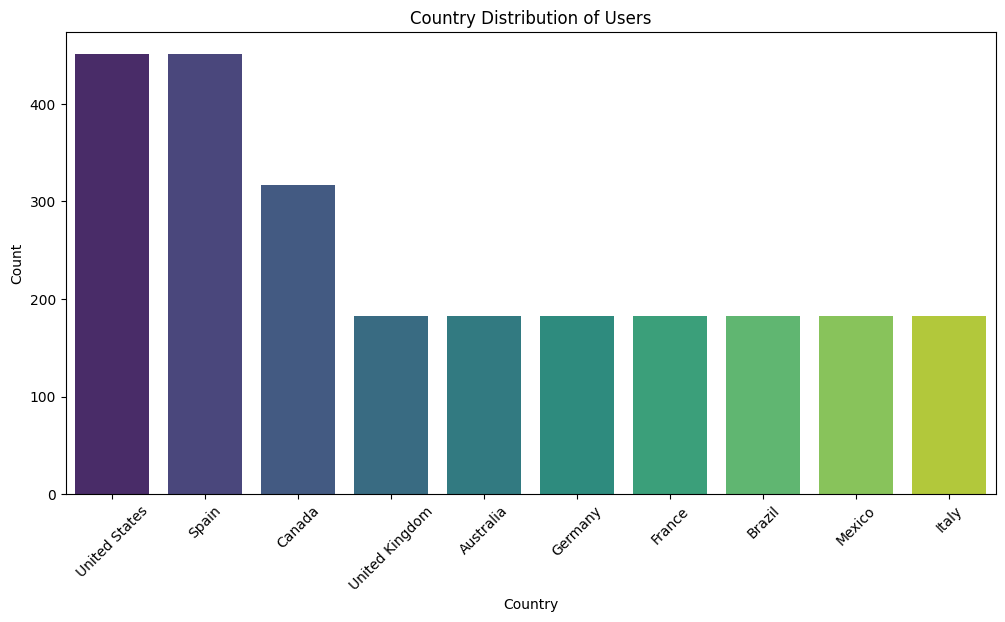

In [ ]:
# Country Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=dataSet, palette='viridis', order=dataSet['Country'].value_counts().index)
plt.title('Country Distribution of Users')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-259-58affc7b262a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=dataSet, palette='pastel')


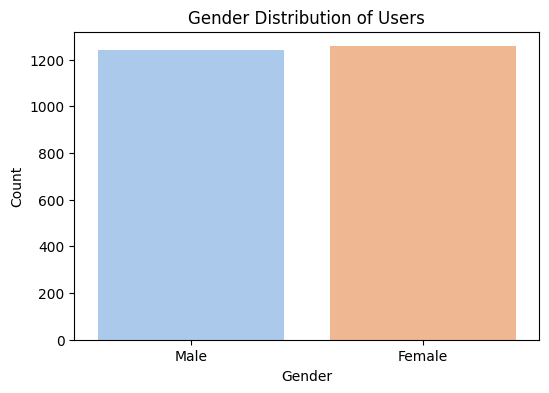

In [ ]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=dataSet, palette='pastel')
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

***Build the Model:*** Develop a linear regression model to predict the Monthly Revenue based on
selected features.

In [ ]:
# Drop irrelevant columns
X = dataSet.drop(columns=['User ID', 'Join Date', 'Last Payment Date'])
y = dataSet['Monthly Revenue']

In [ ]:
# Define categorical features for one-hot encoding
catFeatures = ['Subscription Type', 'Country', 'Gender', 'Device', 'Plan Duration']

In [ ]:
# Define the ColumnTransformer for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), catFeatures)
    ],
    remainder='passthrough'
)

In [ ]:
# Define the Linear Regression model
linearModel = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the model
linearModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Subscription Type',
                                                   'Country', 'Gender',
                                                   'Device',
                                                   'Plan Duration'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Make predictions
y_pred_train = linearModel.predict(X_train)
y_pred_test = linearModel.predict(X_test)

***Model Evaluation:*** Evaluate the model using R-squared, RMSE, or other relevant metrics.

In [ ]:
# Model Evaluation
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train R-squared: 1.0
Test R-squared: 1.0
Train RMSE: 1.1172564351953942e-14
Test RMSE: 1.1186535796081803e-14


# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**

***Model Building:*** Assuming a binary feedback variable (positive/negative), construct a logistic
regression model to predict feedback based on user demographics and subscription details.

In [ ]:
# Generate a hypothetical feedback proxy variable (1 for positive feedback, 0 for negative feedback)
np.random.seed(42)  # For reproducibility
dataSet['Feedback'] = np.random.choice([0, 1], size=len(dataSet))

In [ ]:
# Define the features
X = dataSet.drop(columns=['User ID', 'Feedback', 'Join Date', 'Last Payment Date'])  # Dropping irrelevant columns

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, dataSet['Feedback'], test_size=0.2, random_state=42)

In [ ]:
# Build the Logistic Regression model
logisticModel_FB = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
# Fit the model
logisticModel_FB.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Subscription Type',
                                                   'Country', 'Gender',
                                                   'Device',
                                                   'Plan Duration'])])),
                ('classifier', LogisticRegression())])

In [ ]:
# Make predictions
y_pred_train_feedback = logisticModel_FB.predict(X_train)
y_pred_test_feedback = logisticModel_FB.predict(X_test)

***Evaluation:*** Use accuracy, precision, recall, F1-score, and the confusion matrix for model
assessment.

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_test_feedback)
precision = precision_score(y_test, y_pred_test_feedback)
recall = recall_score(y_test, y_pred_test_feedback)
f1 = f1_score(y_test, y_pred_test_feedback)
conf_matrix = confusion_matrix(y_test, y_pred_test_feedback)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.502
Precision: 0.5025125628140703
Recall: 0.4
F1-score: 0.4454342984409799
Confusion Matrix:
 [[151  99]
 [150 100]]


# **Part 5: Comparative Analysis and Visualization**

**Linear**

In [ ]:
# Get feature names after one-hot encoding
feature_names = linearModel.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()

In [ ]:
# Get coefficients from the linear regression model
coefficients = linearModel.named_steps['regressor'].coef_

In [ ]:
# Create a DataFrame to store feature names and their coefficients
featLinear = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

In [ ]:
# Sort features by their absolute coefficients
featLinear['Abs_Coefficient'] = np.abs(featLinear['Coefficient'])
featLinear = featLinear.sort_values(by='Abs_Coefficient', ascending=False)

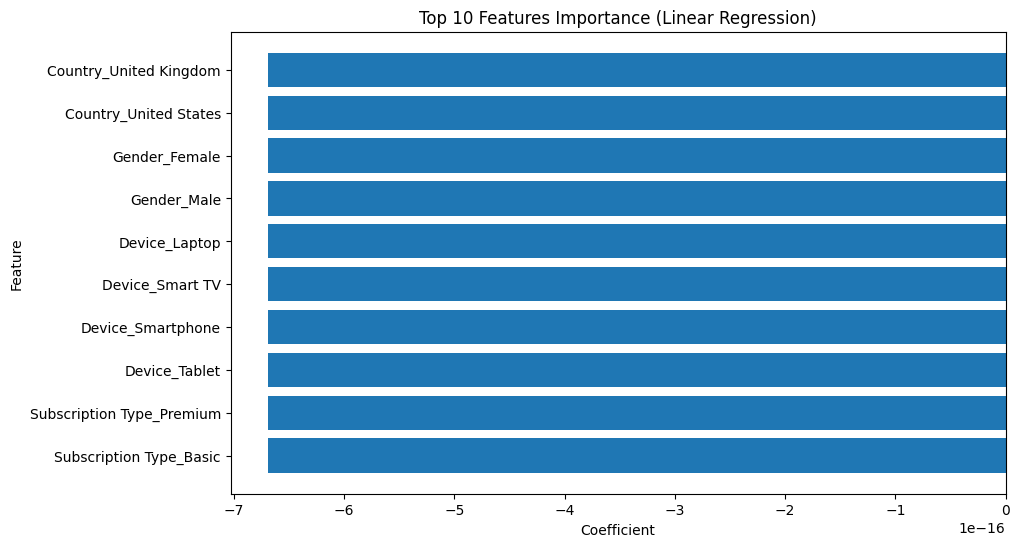

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(featLinear['Feature'][:10], featLinear['Coefficient'][:10])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Features Importance (Linear Regression)')
plt.show()

**Logistic**

In [ ]:
# Get feature names after one-hot encoding
feature_names = logisticModel_FB.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()

In [ ]:
# Get coefficients from the logistic regression model
coefficients = logisticModel_FB.named_steps['classifier'].coef_[0]

In [ ]:
# Create a DataFrame to store feature names and their coefficients
featLogistic = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

In [ ]:
# Sort features by their absolute coefficients
featLogistic['Abs_Coefficient'] = np.abs(featLogistic['Coefficient'])
featLogistic = featLogistic.sort_values(by='Abs_Coefficient', ascending=False)

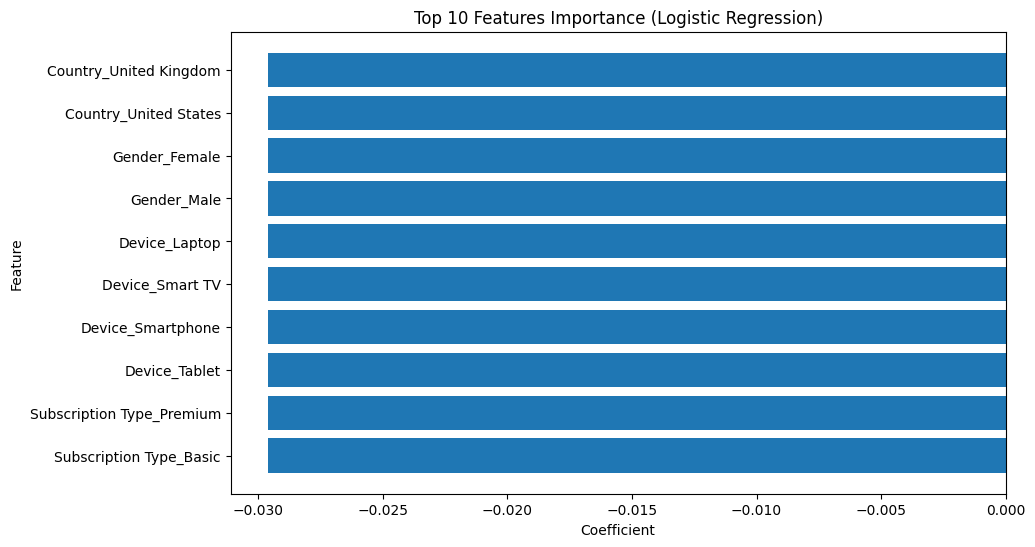

In [ ]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(featLogistic['Feature'][:10], featLogistic['Coefficient'][:10])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Features Importance (Logistic Regression)')
plt.show()


**Insights**:

Predicting the monthly revenue and feedback is a bit tricky. From our models' predictions, we can now see how various factors can influence the monthly revenue and feedback.

Getting the monthly revenue has a lot of processes, and going back to our model, we can see that there are features that affect the monthly revenue, such as country, gender, device, and subscription type. On our visualization of Part 5, the linear regression one, you can see the top feature importance, and these four are there. We consider these features as factors that might influence the monthly revenue, and as shown above, they are at the top. Users who have a premium  subscription type are the rich ones and tend to spend more for the subscription.

Same as the feedback, those four have an influence on the feedback of the customers, as users only give feedback that is based on their hands-on experience.

In summary, this model represents how various features might influence the monthly revenue and feedbak. The features included are the best basis for this and are considered the top features that are used to predict monthly revenue and feedback.
